En este ejercicio, utilizaremos el dataset de automóviles disponible en el siguiente enlace: https://archive.ics.uci.edu/static/public/9/auto+mpg.zip. Este conjunto de datos contiene información sobre varios atributos de automóviles, incluyendo Millas por galón de combustible (MPG) y Caballos de Fuerza (HP).

a. Ajustar un modelo lineal que relacione MPG con HP utilizando todos los puntos del dataset. Calcular el 𝑅2 para este modelo.

(i)Ajustar logaritmo de MPG vs HP y calcular 𝑅2.
(ii)Ajustar logaritmo de MPG vs logaritmo HP y calcular 𝑅2.

In [3]:
# Librerias
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:

file_path = 'C:/Users/lucas/Documents/AaUNSAM/2024_2_Cuatrimestre/Estadistica_Inferencia_1/Prácticas/REPO/Practica 3/File4y5/auto-mpg.data'
df = pd.read_csv(file_path, delim_whitespace=True , header=None)


C:\Users\lucas\AppData\Local\Temp\ipykernel_7884\3496115707.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True , header=None)


In [5]:
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [6]:
# asingo nombre a las columnas 
df.columns = ['mpg', 'cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']


In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
#Debo modificar el tipo de informacion de las columnas
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce') # Convertir horsepower a numérico
# dropeo las filas con valores nulos
df.dropna(inplace=True)


Ajustar un modelo lineal que relacione MPG con HP utilizando todos los puntos del dataset.
Calcular el R 2 para este modelo.

R2 del MPG vs HP: 0.605948257889435
Intercepto (beta_0): 194.4756431901867
Pendiente (beta_1): -3.8388880326580046


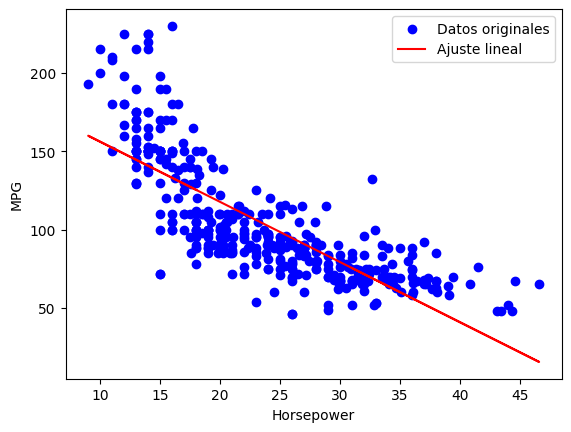

In [10]:
x1 = df['mpg']
y1 = df['horsepower']


# realizo el ajuste lineal
# Calcular medias de x1 y y1
x_mean = np.mean(x1)
y_mean = np.mean(y1)

#Calculo la pendiente b1 y el intercepto b0
numerator = np.sum((x1 - x_mean) * (y1 - y_mean))
denominator = np.sum((x1 - x_mean) ** 2)

beta_1 = numerator / denominator
beta_0 = y_mean - beta_1 * x_mean

# Predicción del ajuste lineal
y_pred = beta_0 + beta_1 * x1

# Residuos
residuals = y1 - y_pred
r2 = 1 - np.sum(residuals**2) / np.sum((y1 - y_mean)**2)
print('R2 del MPG vs HP:', r2)


# Mostrar resultados
print(f'Intercepto (beta_0): {beta_0}')
print(f'Pendiente (beta_1): {beta_1}')

# Graficar los datos y la recta de regresión
plt.scatter(x1, y1, color='blue', label='Datos originales')
plt.plot(x1, y_pred, color='red', label='Ajuste lineal')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()

R2 del logMPG vs HP: 0.6891575108068901


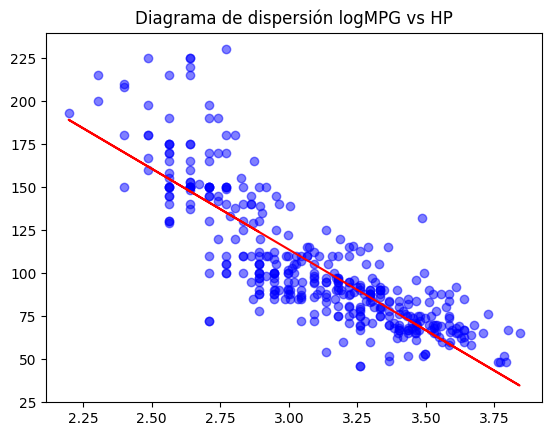

In [11]:
# Ajuste  log MPG vs HP
x1_log = np.log(x1)

# Obtengo b1,b0 con polyfit
b1, b0 = np.polyfit(x1_log, y1, deg = 1)

# Calculo los residuos
residuos = y1 - (b0 + b1*x1_log)
r2 = 1 - np.sum(residuos**2) / np.sum((y1 - y_mean)**2)
print('R2 del logMPG vs HP:', r2)
 
# Graficar el diagrama de dispersión
plt.scatter(x1_log, y1, color='blue', alpha=0.5)
plt.plot(x1_log, x1_log*b1 + b0, color='red')
plt.title('Diagrama de dispersión logMPG vs HP')
plt.show()


R2 del logMPG vs logHP: 0.722696751235987


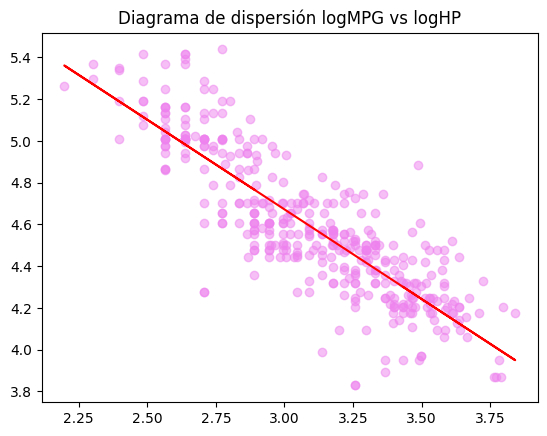

In [12]:
# Ajuste  log MPG vs logHP
x1_log = np.log(x1)
y1_log = np.log(y1)

# Obtengo b1,b0 con polyfit
b1, b0 = np.polyfit(x1_log, y1_log, deg = 1)

# Calculo los residuos
y = (b0 + b1*x1_log)

residuos = y1_log - y # (log yi - y_pred)
r2 = 1 - np.sum(residuos**2) / np.sum((y1_log - np.mean(y1_log))**2)
print('R2 del logMPG vs logHP:', r2)
 
# Graficar el diagrama de dispersión
plt.scatter(x1_log, y1_log, color='violet', alpha=0.5)
plt.plot(x1_log, x1_log*b1 + b0, color='red')
plt.title('Diagrama de dispersión logMPG vs logHP')
plt.show()


(b) Veamos qué pasa si no usamos todo el dataset sino sólo un porcentaje.

- Ajustar un modelo lineal a MPGvsHP,pero esta vez utilizando solo el 80% de los puntos del dataset seleccionados al azar. ¿Cuánto vale 𝑅2? ¿Y sobre el 20% restante de los puntos?
- Repetir el punto anterior para diferentes porcentajes de datos de entrenamiento.

R2 del MPG vs HP (80% test): 0.6121235120520392
Intercepto (beta_0): 193.4372442154492
Pendiente (beta_1): -3.7646356157685


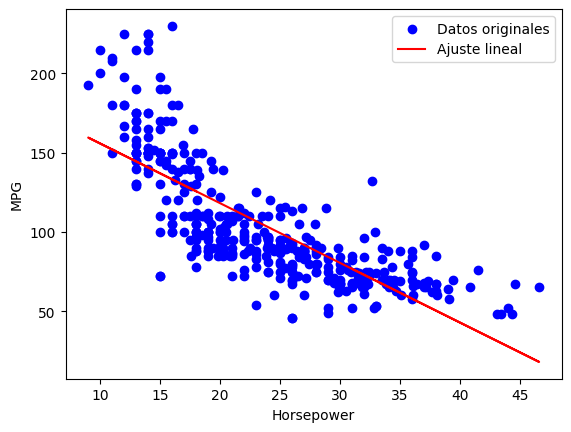

R2 del MPG vs HP (20% test): 0.5953159863005624


In [13]:
# Realizo el mismo analisis pero con el 80% de los datos
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

# Ajuste lineal

# realizo el ajuste lineal
# Calcular medias de x1 y y1
x_mean_train = np.mean(x_train)
y_mean_train = np.mean(y_train)

#Calculo la pendiente b1 y el intercepto b0
numerator = np.sum((x_train - x_mean_train) * (y_train - y_mean_train))
denominator = np.sum((x_train - x_mean_train) ** 2)

beta_1 = numerator / denominator
beta_0 = y_mean_train - beta_1 * x_mean_train

# Predicción del ajuste lineal
y_pred = beta_0 + beta_1 * x1

# residuos y r2
residuals = y_train - y_pred
r2 = 1 - np.sum(residuals**2) / np.sum((y_train - y_mean)**2)
print('R2 del MPG vs HP (80% test):', r2)


# Mostrar resultados
print(f'Intercepto (beta_0): {beta_0}')
print(f'Pendiente (beta_1): {beta_1}')

# Graficar los datos y la recta de regresión
plt.scatter(x1, y1, color='blue', label='Datos originales')
plt.plot(x1, y_pred, color='red', label='Ajuste lineal')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()


# con el 20% restante r2 

x_mean_test = np.mean(x_test)
y_mean_test = np.mean(y_test)

#Calculo la pendiente b1 y el intercepto b0
numerator = np.sum((x_test - x_mean_test) * (y_test - y_mean_test))
denominator = np.sum((x_test - x_mean_test) ** 2)

beta_1 = numerator / denominator
beta_0 = y_mean_train - beta_1 * x_mean_test

# Predicción del ajuste lineal
y_pred = beta_0 + beta_1 * x1

# residuos y r2
residuals = y_test - y_pred
r2 = 1 - np.sum(residuals**2) / np.sum((y_test - y_mean_test)**2)
print('R2 del MPG vs HP (20% test):', r2)

c) Utilizando el dataset completo, realizar ajustes lineales para relacionar MPG con cada una de las variables. Ordenar las variables de acuerdo al 𝑅2 obtenido de la más importante a la menos importante

In [14]:
R2_Result = {}
columnas= ['cylinders','displacement','horsepower','weight','acceleration','model_year','origin']

df[columnas] = df[columnas].apply(pd.to_numeric, errors='coerce')
df['mpg'] = pd.to_numeric(df['mpg'], errors='coerce')
df.dropna(subset=columnas,inplace=True)

x = df['mpg']

for columna in columnas:
    y = df[columna]
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    # obtengo b1 y b0 con polifit
    b1, b0 = np.polyfit(x, y, deg = 1)
    # Calculo los residuos
    residuos = y - (b0 + b1*x)
    r2 = 1 - np.sum(residuos**2) / np.sum((y - y_mean)**2)
    R2_Result[columna] = r2

R2_Result = dict(sorted(R2_Result.items(), key=lambda item: item[1], reverse=True))
print(R2_Result)

{'weight': np.float64(0.6926304331206254), 'displacement': np.float64(0.6482294003193045), 'horsepower': np.float64(0.605948257889435), 'cylinders': np.float64(0.6046889889441245), 'model_year': np.float64(0.3370278133096227), 'origin': np.float64(0.3194609386689673), 'acceleration': np.float64(0.1792070501562545)}


5) Con el dataset del ejercicio anterior:
- (a) Ajustar una regresión lineal múltiple de MPG en función de todas las otras variables. Hacer los gráficos pertinentes para analizar el comportamiento del modelo.

In [15]:
# dos formas 
# gpt 1 forma mas matematica

import numpy as np
import pandas as pd

# Filtrar variables relevantes y manejar valores faltantes
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df.dropna(inplace=True)

# Seleccionar las variables independientes y la dependiente (MPG)
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']].values
y = df['mpg'].values

# Agregar una columna de unos para el intercepto (beta_0)
X = np.hstack([np.ones((X.shape[0], 1)), X])  # Agregamos una columna de unos al inicio

# Regresión lineal múltiple: calcular (X^T * X)^-1 * X^T * y
# Transpuesta de X
X_T = X.T

# Matriz (X^T * X)
X_T_X = np.dot(X_T, X)

# Inversa de (X^T * X)
X_T_X_inv = np.linalg.inv(X_T_X)

# Producto de la inversa con X^T
X_T_y = np.dot(X_T, y)

# Calcular los coeficientes beta
beta = np.dot(X_T_X_inv, X_T_y)

# Imprimir los coeficientes
print("Coeficientes de la regresión lineal múltiple (incluyendo el intercepto):", beta)

# Hacer predicciones con los coeficientes obtenidos
y_pred = np.dot(X, beta)

# Calcular el R² (coeficiente de determinación)
SS_tot = np.sum((y - np.mean(y)) ** 2)  # Suma total de cuadrados
SS_res = np.sum((y - y_pred) ** 2)  # Suma residual de cuadrados
R2 = 1 - (SS_res / SS_tot)

print(f"R² para la regresión lineal múltiple: {R2}")


Coeficientes de la regresión lineal múltiple (incluyendo el intercepto): [-1.72184346e+01 -4.93376319e-01  1.98956437e-02 -1.69511442e-02
 -6.47404340e-03  8.05758383e-02  7.50772678e-01  1.42614050e+00]
R² para la regresión lineal múltiple: 0.8214780764810599


In [16]:
# segunda forma 
def get_beta_hat(X, y):
    # Calcular los coeficientes beta_hat = (X^T * X)^-1 * X^T * y (inv = ^-1)
    beta_hat =  np.linalg.inv(X.T @ X) @ X.T @ y # @ es el operador para multiplicación de matrices
    return beta_hat

regresores  = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']
X = df[regresores].values
y = df['mpg'].values

X = np.c_[np.ones(X.shape[0]), X]  # Agregar una columna de unos para el intercepto

beta_hat = get_beta_hat(X, y)
print('Los coeficientes de estimados son:', beta_hat)

Los coeficientes de estimados son: [-1.72184346e+01 -4.93376319e-01  1.98956437e-02 -1.69511442e-02
 -6.47404340e-03  8.05758383e-02  7.50772678e-01  1.42614050e+00]


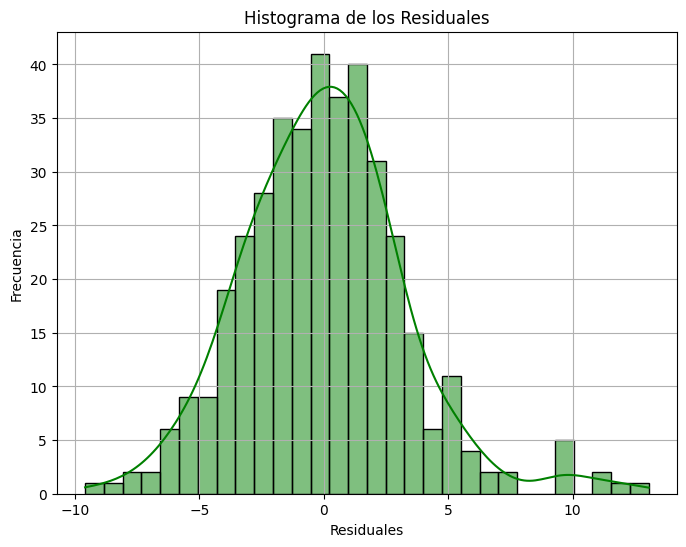

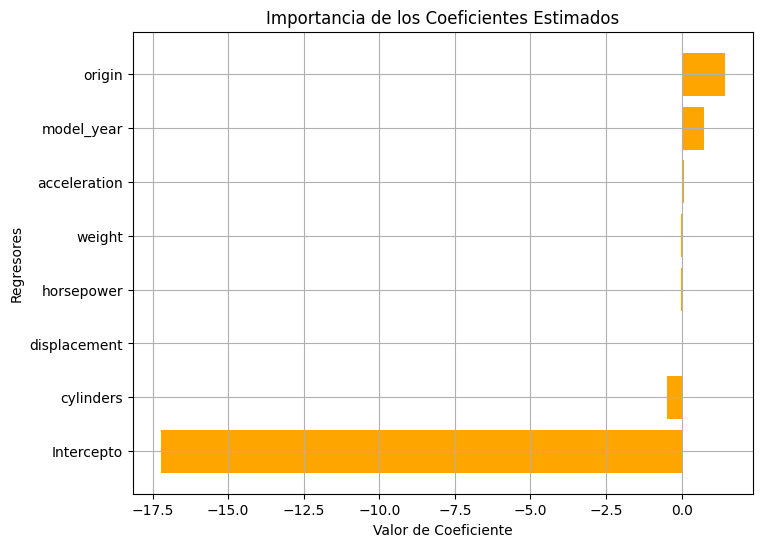

In [17]:
# Analisis de los residuos
y_pred = X @ beta_hat

residuos = y - y_pred

# Graficar los residuos
plt.figure(figsize=(8, 6))
sns.histplot(residuos, kde=True, color='green', bins=30)
plt.title('Histograma de los Residuales')
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

#Gráfico de importancia de los coeficientes
coef_names = ['Intercepto'] + regresores  # Incluye el intercepto
plt.figure(figsize=(8, 6))
plt.barh(coef_names, beta_hat, color='orange')
plt.title('Importancia de los Coeficientes Estimados')
plt.xlabel('Valor de Coeficiente')
plt.ylabel('Regresores')
plt.grid(True)
plt.show()

- b)Hacer forward selection para seleccionar el mejor modelo de regresión según el estadístico de Mallow. Este proceso consiste en agregar una variable a la vez al modelo inicial y comparar el valor del estadístico de Mallow para cada modelo, eligiendo el del valor más bajo.

In [21]:
# WTF i am supposed to do without gpt?

# Estadistico de mallows sin scikit learn
def get_mallows_stat(X, y, sigma_squared, p): # p es el número de regresores
    # Ajustar el modelo de regresión lineal
    beta_hat = get_beta_hat(X,y)
    y_pred = X @ beta_hat
    # Calcular los residuos 
    SSE_p = np.sum((y - y_pred) ** 2)  # Suma residual de cuadrados SSE(p)
    # Calcular el estadístico de Mallows
    n = X.shape[0]  # Número de observaciones
    mallows_stat = (SSE_p / sigma_squared) + 2 * p - n 
    return mallows_stat

# Calcular la varianza de los errores del modelo
def calcular_sigma_squared(X, y):
    beta_hat = get_beta_hat(X, y)
    y_pred = X @ beta_hat
    SSE_p = np.sum((y - y_pred) ** 2)  # Suma residual de cuadrados SSE(p)
    sigma_squared = SSE_p / (len(y) - X.shape[1])  # Varianza de los errores del modelo
    return sigma_squared

# Realizar Forward Selection con el estadístico de Mallows Cp
def forward_selection_cp(X, y, max_features):
    # Lista de todas las variables disponibles
    variables_disponibles = list(range(X.shape[1]))
    
    # Empezamos con un modelo vacío
    variables_seleccionadas = []
    sigma_squared = calcular_sigma_squared(X, y)
    mejor_modelo = []
    mejor_Cp = float('inf')

    # Repetir hasta que se seleccionen el número máximo de variables o Cp no mejore
    for _ in range(max_features):
        Cp_minimo = float('inf')
        mejor_variable = None

        # Intentar agregar cada variable no seleccionada al modelo actual
        for variable in variables_disponibles:
            # Crear el modelo con las variables seleccionadas más la nueva variable
            X_temp = X[:, variables_seleccionadas + [variable]]
            
            # Calcular el Cp para este modelo
            Cp = get_mallows_stat(X_temp, y, sigma_squared, p=len(variables_seleccionadas) + 1)
            
            # Verificar si es el mejor Cp encontrado hasta ahora
            if Cp < Cp_minimo:
                Cp_minimo = Cp
                mejor_variable = variable

        # Detener el proceso si el Cp no mejora
        if Cp_minimo >= mejor_Cp:
            print(f"Se detiene la selección en el modelo con {len(variables_seleccionadas)} variables, Cp: {mejor_Cp}")
            break

        # Agregar la mejor variable encontrada si mejora Cp
        if mejor_variable is not None:
            variables_seleccionadas.append(mejor_variable)
            variables_disponibles.remove(mejor_variable)
            mejor_Cp = Cp_minimo
            mejor_modelo = variables_seleccionadas.copy()

        # Imprimir el estado del modelo
        print(f"Variables seleccionadas: {[regresores[i] for i in mejor_modelo]}, Mallows Cp: {mejor_Cp}")

    return mejor_modelo, mejor_Cp

# Realizar forward selection
regresores_seleccionados, mallows_stats = forward_selection_cp(X, y, max_features=len(regresores))

# imprimir el resultado
print('Regresores seleccionados:', regresores_seleccionados)
print('Estadísticos de Mallows:', mallows_stats)
print(f"Variables seleccionadas: {[regresores[i] for i in regresores_seleccionados]}") # Regresores seleccionados = mejor modelo

Variables seleccionadas: ['acceleration'], Mallows Cp: 1343.3426230255411
Variables seleccionadas: ['acceleration', 'origin'], Mallows Cp: 832.2542616784503
Variables seleccionadas: ['acceleration', 'origin', 'weight'], Mallows Cp: 676.1051757626717
Variables seleccionadas: ['acceleration', 'origin', 'weight', 'model_year'], Mallows Cp: 15.827216683618815
Variables seleccionadas: ['acceleration', 'origin', 'weight', 'model_year', 'horsepower'], Mallows Cp: 11.379622326697813
Variables seleccionadas: ['acceleration', 'origin', 'weight', 'model_year', 'horsepower', 'displacement'], Mallows Cp: 9.758711941074466
Variables seleccionadas: ['acceleration', 'origin', 'weight', 'model_year', 'horsepower', 'displacement', 'cylinders'], Mallows Cp: 7.000000000000057
Regresores seleccionados: [6, 3, 0, 2, 5, 4, 1]
Estadísticos de Mallows: 7.000000000000057
Variables seleccionadas: ['acceleration', 'origin', 'weight', 'model_year', 'horsepower', 'displacement', 'cylinders']


- c)  Realizar la regresión con todas las variables, pero con regularización de Ridge y de Lasso.
Dividir el dataset en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%)
para elegir el mejor valor de λ para cada uno.

In [29]:
# Regularización Ridge7

from sklearn.metrics import r2_score

def ridge_regression(X, y, lambda_):
    m = X.shape[1]
    I = np.eye(m) # Return a 2-D array with ones on the diagonal and zeros elsewhe
    beta_hat_ridge = np.linalg.inv(X.T @ X + lambda_ * I) @ X.T @ y
    return beta_hat_ridge

# Regularización Lasso (usando descenso de gradiente)
def lasso_regression(X, y, lambda_, lr=0.01, num_iter=1000):
    m = X.shape[1]
    beta_hat_lasso = np.zeros(m)
    for _ in range(num_iter):
        y_hat = X @ beta_hat_lasso
        gradient = -2 * X.T @ (y - y_hat) + lambda_ * np.sign(beta_hat_lasso)
        beta_hat_lasso -= lr * gradient
    return beta_hat_lasso

# Dividir el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encontrar el mejor valor de lambda para Ridge
lambdas = np.logspace(-4, 4, 100)
best_lambda_ridge = 0
best_r2_ridge = -np.inf
for lambda_ in lambdas:
    beta_hat_ridge = ridge_regression(X_train, y_train, lambda_)
    y_pred_ridge = X_test @ beta_hat_ridge
    r2_ridge = r2_score(y_test, y_pred_ridge)
    if r2_ridge > best_r2_ridge:
        best_r2_ridge = r2_ridge
        best_lambda_ridge = lambda_

print(f"Mejor lambda para Ridge: {best_lambda_ridge}, R2: {best_r2_ridge}")

# Encontrar el mejor valor de lambda para Lasso
best_lambda_lasso = 0
best_r2_lasso = -np.inf
for lambda_ in lambdas:
    beta_hat_lasso = lasso_regression(X_train, y_train, lambda_)
    y_pred_lasso = X_test @ beta_hat_lasso
    if not np.isnan(y_pred_lasso).any():
        r2_lasso = r2_score(y_test, y_pred_lasso)
        if r2_lasso > best_r2_lasso:
            best_r2_lasso = r2_lasso
            best_lambda_lasso = lambda_

print(f"Mejor lambda para Lasso: {best_lambda_lasso}, R2: {best_r2_lasso}")

#Dividimos el dataset en train y test
# regresores
regresores = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']
X = df[regresores].values
y = df['mpg'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
beta_hat = get_beta_hat(X_train, y_train)
y_hat = X_train @ beta_hat

#Regularización Lasso
def loss(beta_hat, X, y, incognita):
    y_hat = X @ beta_hat
    loss_lasso = np.sum((y - y_hat)**2) + incognita * np.sum(np.abs(beta_hat))
    return loss_lasso
#lasso = np.sum((y_train - y_hat)**2) + incognita * np.sum(np.abs(beta_hat))

Mejor lambda para Ridge: 114.9756995397738, R2: 0.7873384286225654


C:\Users\lucas\AppData\Local\Temp\ipykernel_7884\896715560.py:17: RuntimeWarning: overflow encountered in matmul
  gradient = -2 * X.T @ (y - y_hat) + lambda_ * np.sign(beta_hat_lasso)
C:\Users\lucas\AppData\Local\Temp\ipykernel_7884\896715560.py:18: RuntimeWarning: invalid value encountered in subtract
  beta_hat_lasso -= lr * gradient


Mejor lambda para Lasso: 0, R2: -inf


NameError: name 'incognita' is not defined